<h1> Problem

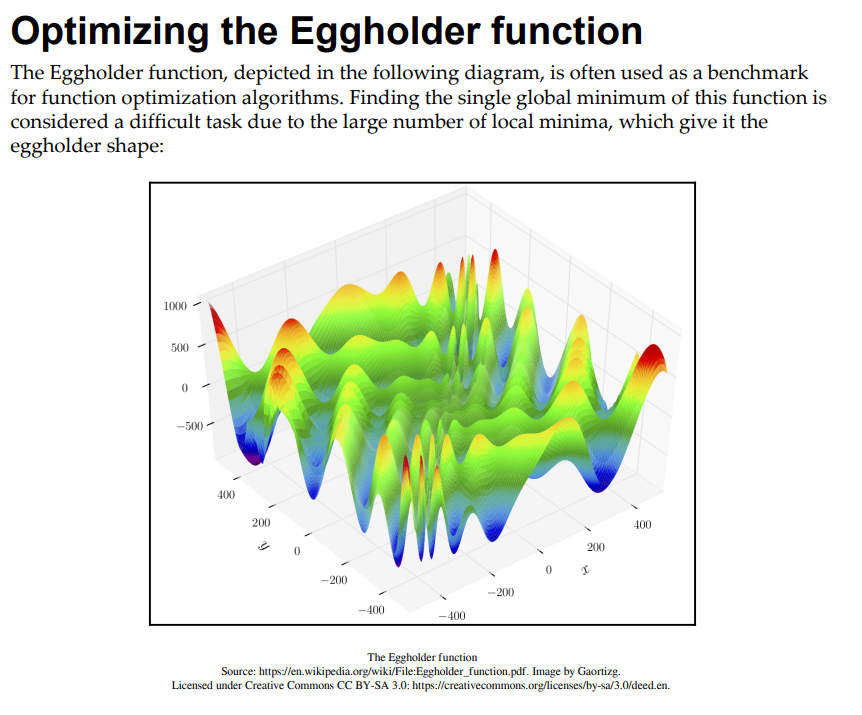

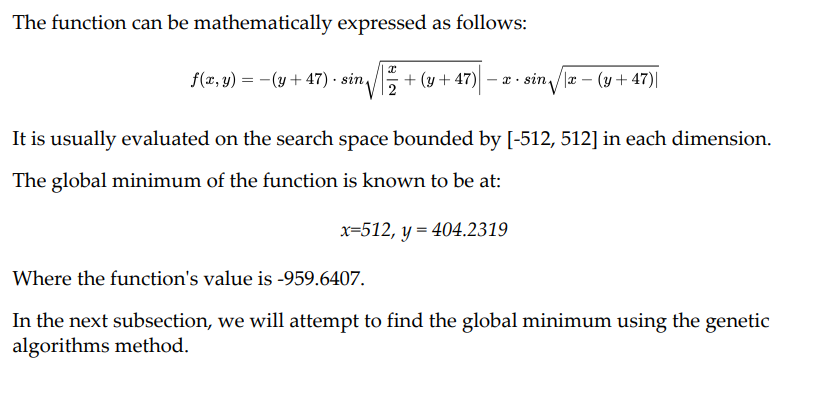

In [1]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1> Representation and fitness function

In [2]:

# For this problem we will use a chromosome with the number of genes equal the number of constants that we want to find
solution = [512, 404.2319]

def fitness_function(solution):
  import numpy as np
  x = solution[0]
  y = solution[1]
  fitness = (-(y + 47.0) * np.sin(np.sqrt(abs(x/2.0 + (y + 47.0)))) - x * np.sin(np.sqrt(abs(x - (y + 47.0)))))
  return fitness,

fitness_function(solution)

(-959.6406627106155,)

<h1> Solving the problem

In [10]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
CHROMOSOME_LENGTH = 2 # Dimensions of variables
BOUND_LOW, BOUND_UP = -512.0, 512.0 # Defining the limits of function domain
def gene(l,u):
  return random.uniform(l,u)
toolbox.register("Gene", gene, l=BOUND_LOW, u=BOUND_UP)
toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=CHROMOSOME_LENGTH)
toolbox.register("Individuo", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individuo)


# GENETIC OPERATORS
ETA = 20 # CONSTANT OF MUTATE FUNCTION
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=5)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP, indpb=2/CHROMOSOME_LENGTH)

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(3)


# CONTROL PANEL
POPULATION_SIZE = 1000
PROBABILITY_CROSSOVER = 0.75
PROBABILITY_MUTATION = 0.25
MAX_GENERATIONS = 250 # (stopping condition)
#random.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = algorithms.eaSimple(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max    	min    	mean  
0  	1000  	891.047	-956.64	6.3532
1  	808   	839.429	-956.64	-187.49
2  	793   	997.144	-956.64	-305.366
3  	822   	1044.71	-956.655	-404.818
4  	807   	990.609	-956.64 	-502.667
5  	817   	952.182	-957.678	-576.406
6  	811   	907.654	-957.678	-596.441
7  	804   	849.207	-957.678	-676.655
8  	799   	734.523	-957.678	-677.498
9  	818   	660.711	-958.232	-707.422
10 	817   	627.236	-958.83 	-728.822
11 	819   	638.533	-958.83 	-770.689
12 	803   	786.424	-959.123	-737.617
13 	809   	665.16 	-959.123	-716.164
14 	780   	628.126	-959.577	-775.319
15 	815   	735.209	-959.604	-793.333
16 	811   	681.028	-959.624	-786.997
17 	803   	769.355	-959.624	-785.339
18 	806   	703.037	-959.626	-800.538
19 	804   	723.476	-959.63 	-779.725
20 	814   	643.585	-959.638	-795.628
21 	817   	719.112	-959.638	-772.88 
22 	815   	694.504	-959.638	-801.974
23 	828   	778.115	-959.639	-781.723
24 	827   	663.096	-959.639	-814.985
25 	828   	755.613	-959.64 	-788.108
26 	808   

<h1> Plotting the results

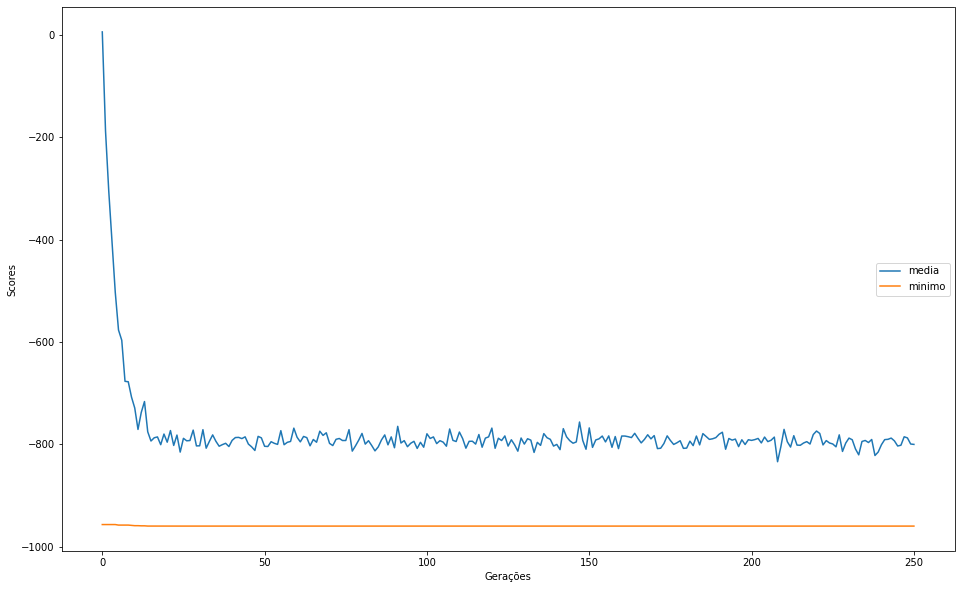

In [11]:
import matplotlib.pyplot as plt

# taking data
y_mean = logbook.select("mean")
y_min = logbook.select("min")
#y_max = logbook.select("max")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(16,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
#plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

In [12]:
import matplotlib.pyplot as plt
print("Our solution is:")
print(hof[0])
print("Fitness value ", fitness_function(hof[0]))
print("\nBest book solution is:")
print("[512.0, 404.23180541839946]")
print("Fitness value ", fitness_function([512.0, 404.23180541839946])) 


Our solution is:
[512.0, 404.23180505697593]
Fitness value  (-959.6406627208507,)

Best book solution is:
[512.0, 404.23180541839946]
Fitness value  (-959.6406627208509,)


<h1> Trying to improve the result with elitism

In [13]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [34]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
CHROMOSOME_LENGTH = 2 # Dimensions of variables
BOUND_LOW, BOUND_UP = -512.0, 512.0 # Defining the limits of function domain
def gene(l,u):
  return random.uniform(l,u)
toolbox.register("Gene", gene, l=BOUND_LOW, u=BOUND_UP)
toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=CHROMOSOME_LENGTH)
toolbox.register("Individuo", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individuo)


# GENETIC OPERATORS
ETA = 30 # CONSTANT OF MUTATE FUNCTION
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP, indpb=2/CHROMOSOME_LENGTH)

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(100)


# CONTROL PANEL
POPULATION_SIZE = 1000
PROBABILITY_CROSSOVER = 0.5
PROBABILITY_MUTATION = 0.5
MAX_GENERATIONS = 100 # (stopping condition)
#random.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = eaSimpleWithElitism(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max    	min     	mean     
0  	1000  	839.422	-891.237	-0.443035
1  	663   	880.838	-940.489	-142.62  
2  	683   	876.502	-940.489	-226.642 
3  	673   	962.066	-940.489	-294.126 
4  	666   	958.846	-940.489	-336.192 
5  	679   	1019.32	-940.489	-408.261 
6  	689   	1026.9 	-940.489	-418.85  
7  	639   	1036.34	-955.339	-484.265 
8  	705   	981.573	-955.339	-478.811 
9  	668   	952.87 	-955.339	-534.662 
10 	656   	1010.4 	-955.339	-545.618 
11 	655   	964.681	-955.339	-553.222 
12 	653   	1017.82	-955.339	-541.833 
13 	698   	882.965	-957.222	-562.614 
14 	660   	909.108	-958.067	-578.74  
15 	686   	824.404	-958.067	-571.175 
16 	665   	773.758	-959.308	-571.041 
17 	686   	759.923	-959.351	-563.411 
18 	666   	859.743	-959.612	-594.577 
19 	684   	775.06 	-959.612	-575.059 
20 	669   	923.332	-959.612	-577.823 
21 	675   	670.94 	-959.612	-572.746 
22 	698   	676.645	-959.612	-571.395 
23 	700   	746.686	-959.612	-588.749 
24 	679   	713.675	-959.628	-600.006 
25 	678   	7

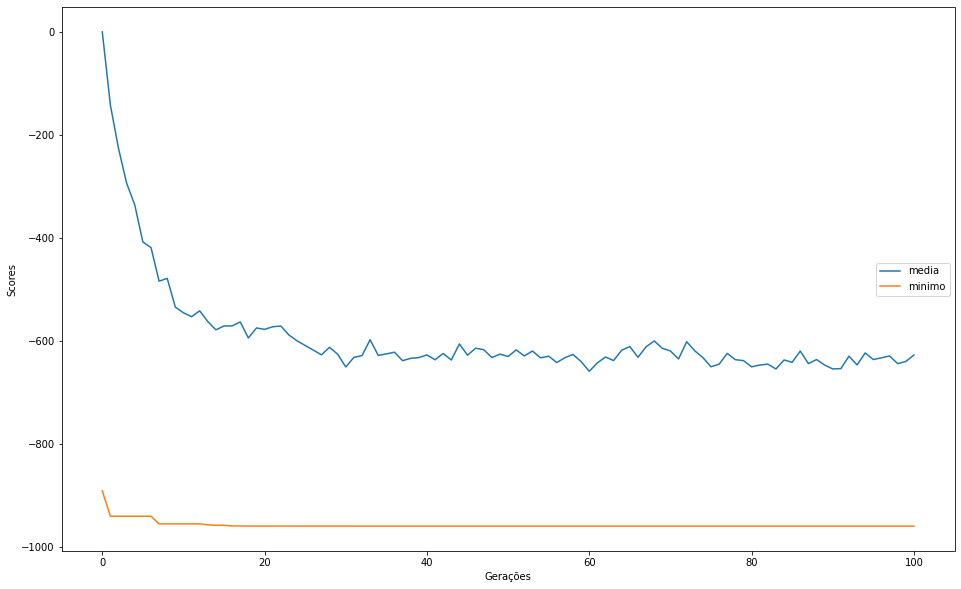

In [35]:
import matplotlib.pyplot as plt

# taking data
y_mean = logbook.select("mean")
y_min = logbook.select("min")
#y_max = logbook.select("max")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(16,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
#plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

In [36]:
print("Our solution is:")
print(hof[0])
print("Fitness value ", fitness_function(hof[0]))
print("\nBest book solution is:")
print("[512.0, 404.23180541839946]")
print("Fitness value ", fitness_function([512.0, 404.23180541839946])) 

Our solution is:
[511.99999999995936, 404.2317971701699]
Fitness value  (-959.6406627206413,)

Best book solution is:
[512.0, 404.23180541839946]
Fitness value  (-959.6406627208509,)
